## Inspect results

In [1]:
b = '/Users/nicholassofroniew/Documents/DATA-proteins/proteins'

In [2]:
from pandas import read_csv
from os.path import join
import matplotlib.pyplot as plt
from glob import glob
from pandas import DataFrame
%matplotlib inline

In [4]:
results = read_csv(join(b,'models-lstm3D-2/model-0030','results.csv'))

In [5]:
results = read_csv(join(b,'models-lstmAng1-3D/model-0045','results.csv'))

In [6]:
results

,Unnamed: 0,RMSD,bond_angle,dRMSD,length,omega,phi,psi
0,0,18.557162,60.398399,20.532946,162.0,96.569017,112.055990,88.453847
1,1,18.579917,60.089570,20.426053,162.0,96.632682,112.178915,88.935233
2,2,18.510978,59.797281,20.158372,162.0,96.946888,111.944453,89.936702
3,3,18.564756,59.891528,20.189628,162.0,96.697648,112.312702,88.839966
4,4,18.530962,59.547221,20.359348,162.0,96.908924,111.800173,89.630417
5,5,17.743450,59.290352,20.079696,164.0,96.527708,109.197189,94.808984
6,6,19.441821,59.576787,21.060002,164.0,96.618919,112.250575,90.842411
7,7,18.918251,59.941820,19.762653,162.0,96.465044,112.242501,89.141475
8,8,18.828321,59.768405,20.170168,162.0,96.896679,111.949044,88.916328
9,9,24.376015,60.706505,22.020684,291.0,93.427197,105.923007,90.473960


In [7]:
results.mean()

Unnamed: 0    609.500000
RMSD           27.472620
bond_angle     60.515423
dRMSD          22.019994
length        262.553279
omega          94.504849
phi            99.357256
psi            78.059175
dtype: float64

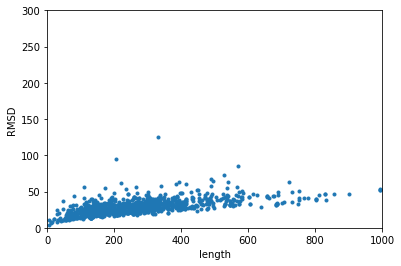

In [9]:
plt.plot(results.length, results.RMSD,'.');
plt.xlabel('length')
plt.ylabel('RMSD')
plt.xlim([0, 1000]);
plt.ylim([0, 300]);

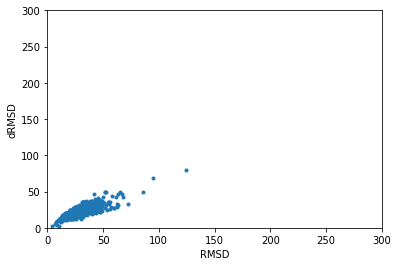

In [10]:
plt.plot(results.RMSD, results.dRMSD,'.');
plt.xlabel('RMSD')
plt.ylabel('dRMSD')
plt.xlim([0, 300]);
plt.ylim([0, 300]);

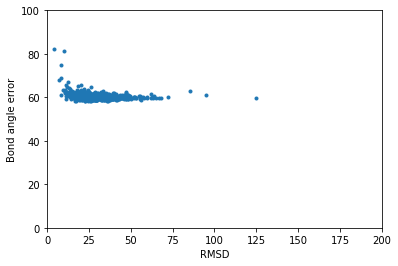

In [14]:
plt.plot(results.RMSD, results.bond_angle,'.');
plt.xlabel('RMSD')
plt.ylabel('Bond angle error')
plt.xlim([0, 200]);
plt.ylim([0, 100]);

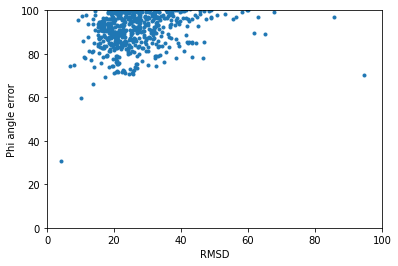

In [15]:
plt.plot(results.RMSD, results.phi,'.');
plt.xlabel('RMSD')
plt.ylabel('Phi angle error')
plt.xlim([0, 100]);
plt.ylim([0, 100]);

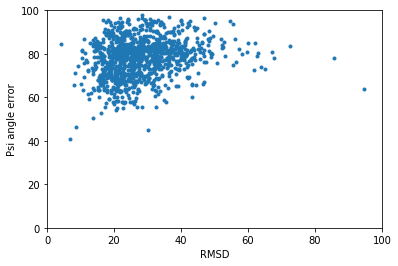

In [16]:
plt.plot(results.RMSD, results.psi,'.');
plt.xlabel('RMSD')
plt.ylabel('Psi angle error')
plt.xlim([0, 100]);
plt.ylim([0, 100]);

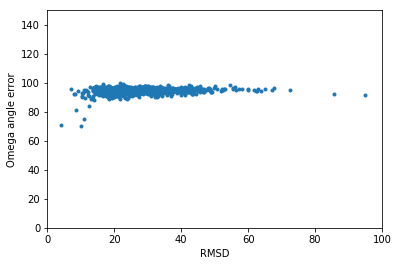

In [18]:
plt.plot(results.RMSD, results.omega,'.');
plt.xlabel('RMSD')
plt.ylabel('Omega angle error')
plt.xlim([0, 100]);
plt.ylim([0, 150]);

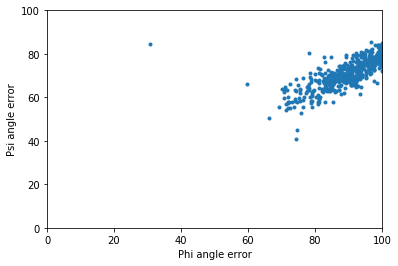

In [19]:
plt.plot(results.phi, results.psi,'.');
plt.xlabel('Phi angle error')
plt.ylabel('Psi angle error')
plt.xlim([0, 100]);
plt.ylim([0, 100]);

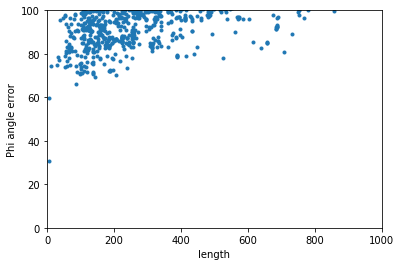

In [21]:
plt.plot(results.length, results.phi,'.');
plt.xlabel('length')
plt.ylabel('Phi angle error')
plt.xlim([0, 1000]);
plt.ylim([0, 100]);

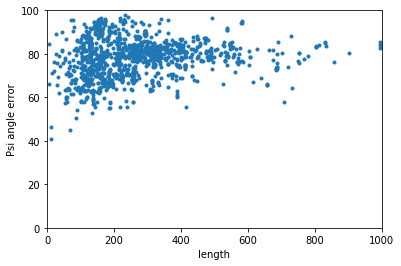

In [22]:
plt.plot(results.length, results.psi,'.');
plt.xlabel('length')
plt.ylabel('Psi angle error')
plt.xlim([0, 1000]);
plt.ylim([0, 100]);

In [191]:
train = read_csv(join(b,'models-lstm3D-2','train.csv'))
val =  read_csv(join(b,'models-lstm3D-2','val.csv'))

In [191]:
train = read_csv(join(b,'models-lstm3D-2','train.csv'))
val =  read_csv(join(b,'models-lstm3D-2','val.csv'))

In [192]:
train = train[39156:]

In [176]:
train = read_csv(join(b,'models-lstmAng1','train.csv'))
val =  read_csv(join(b,'models-lstmAng1','val.csv'))

In [74]:
train = read_csv(join(b,'models-lstmAng1-3D','train.csv'))
val =  read_csv(join(b,'models-lstmAng1-3D','val.csv'))

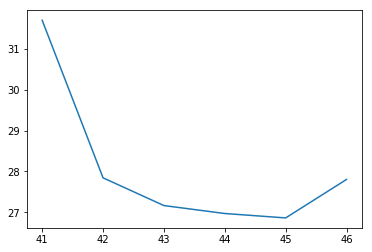

In [75]:
plt.plot(train.groupby('epoch').mean().loss);
plt.plot(val.groupby('epoch').mean().loss);

### look at ramachandran plots for predicted

In [3]:
files = glob(join(b,'val','*.csv'))
dfVal = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfVal = dfVal.append(df)
    ind = ind + 1

In [4]:
#files = glob(join(b,'models-lstm3D-2/model-0030','predict*.csv'))
files = glob(join(b,'models-lstmAng1/model-0040','predict*.csv'))
files = glob(join(b,'models-lstmAng1-3D/model-0040','predict*.csv'))
dfPred = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfPred = dfPred.append(df)
    ind = ind + 1

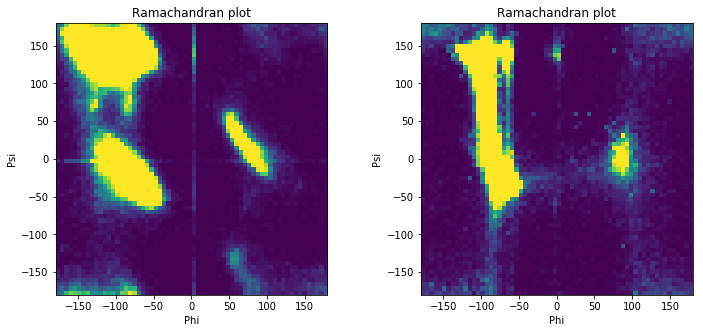

In [5]:
from numpy import histogram2d
plt.figure(figsize=(12,5))
plt.subplot(121)
heatmap, xedges, yedges = histogram2d(-dfVal.torsion_angle[2::3], dfVal.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180]);
plt.ylim([-180, 180]);

plt.subplot(122)
heatmap, xedges, yedges = histogram2d(-dfPred.torsion_angle[2::3], dfPred.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180]);
plt.ylim([-180, 180]);


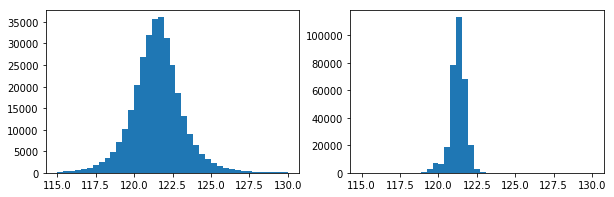

In [6]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(dfVal.bond_angle[::3], bins=linspace(115,130,40));
plt.subplot(122)
plt.hist(dfPred.bond_angle[::3], bins=linspace(115,130,40));

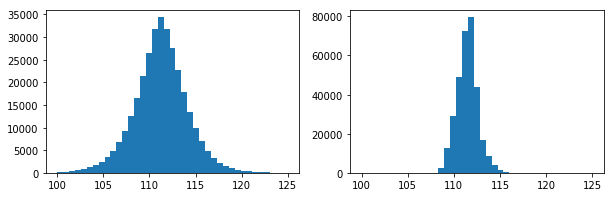

In [7]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(dfVal.bond_angle[1::3], bins=linspace(100,125,40));
plt.subplot(122)
plt.hist(dfPred.bond_angle[1::3], bins=linspace(100,125,40));

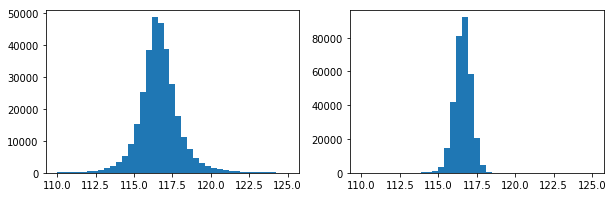

In [8]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(dfVal.bond_angle[2::3], bins=linspace(110,125,40));
plt.subplot(122)
plt.hist(dfPred.bond_angle[2::3], bins=linspace(110,125,40));

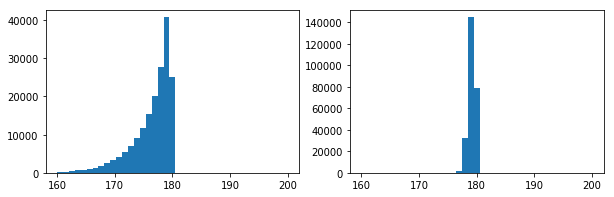

In [9]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
ang = dfVal.torsion_angle[::3]
plt.hist(ang, bins=linspace(160,200,40));
plt.subplot(122)
ang = dfPred.torsion_angle[::3]
plt.hist(ang, bins=linspace(160,200,40));

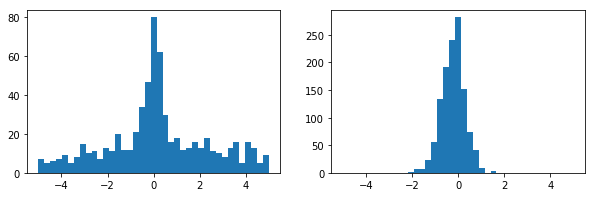

In [10]:
from numpy import linspace, nan
plt.figure(figsize=(10,3))
plt.subplot(121)
ang = dfVal.torsion_angle[::3]
ang[dfVal.res[::3] == 0] = -100
ang[ang>180] = ang[ang>180]-360
plt.hist(ang, bins=linspace(-5,5,40));
plt.subplot(122)
ang = dfPred.torsion_angle[::3]
ang[ang>180] = ang[ang>180]-360
plt.hist(ang, bins=linspace(-5,5,40));

## 3D plots

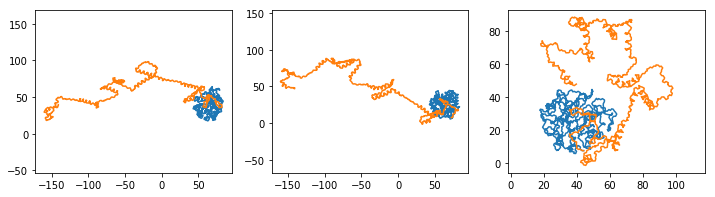

In [11]:
protein_id = 10

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].y);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].y);
plt.axis('equal')
plt.subplot(132)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].z);
plt.axis('equal')
plt.subplot(133)
plt.plot(dfVal[dfPred.id==protein_id].y, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].y, dfPred[dfPred.id==protein_id].z);
plt.axis('equal');

In [12]:
dfPred[dfPred.id==protein_id]

,Unnamed: 0,bond_angle,torsion_angle,x,y,z,id
0,0,0.517310,0.492144,72.586000,44.090000,7.476000,10
1,1,110.840300,-2.844545,73.748000,43.226000,7.485000,10
2,2,116.314125,168.264270,73.574000,41.978000,8.345000,10
3,3,122.914154,178.798420,74.498955,41.033127,8.206455,10
4,4,110.697430,-88.644480,74.487305,39.793827,8.975425,10
5,5,116.479800,122.633545,75.241844,39.967438,10.289339,10
6,6,120.433290,179.403980,74.561340,39.711290,11.401819,10
7,7,110.400580,-90.213280,75.202490,39.837020,12.705262,10
8,8,116.280060,114.667625,75.837010,38.512383,13.115567,10
9,9,121.158100,179.172780,77.162186,38.500748,13.215719,10


In [13]:
from numpy import stack
from numpy.linalg import norm

In [14]:
coords_in = stack([dfVal[dfVal.id==protein_id].x, dfVal[dfVal.id==protein_id].y, dfVal[dfVal.id==protein_id].z], axis=1)
coords_pred = stack([dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].y, dfPred[dfPred.id==protein_id].z], axis=1)

In [43]:
from scipy.spatial.distance import pdist
def dRMSD(x, y):
    return norm(pdist(x) - pdist(y))/((len(x)*(len(x)-1)/2)**(0.5))

In [44]:
dRMSD(coords_in, coords_pred)

88.754447798442115

In [15]:
from torch.autograd import Variable
from torch import FloatTensor

In [49]:
x = Variable(FloatTensor(coords_in))
y = Variable(FloatTensor(coords_pred))

In [50]:
from torch import transpose, mm, diag, clamp
from numpy import inf

In [62]:
def pdist(x):
    x_norm = x.pow(2).sum(1).view(-1, 1)
    y_t = transpose(x, 0, 1)
    y_norm = x_norm.view(1, -1)
    
    dist = x_norm + y_norm - 2*mm(x, y_t)
    dist = dist - diag(dist.diag())
    return clamp(dist.pow(0.5), 0.0, 1e10)

In [63]:
def criterion_drmsd(x, y):
        return ((pdist(x) - pdist(y)).pow(2).mean()*len(x)/(len(x)-1)).pow(0.5)

In [64]:
criterion_drmsd(x, y)

Variable containing:
 88.7544
[torch.FloatTensor of size 1]

In [54]:
900*900

810000

In [45]:
1000*1000

1000000

In [46]:
1e6

1000000.0

In [38]:
qq = pdist(x)

In [39]:
qr = pdist(y)

In [40]:
((qq - qr).pow(2).sum()/len(x)/(len(x)-1)).pow(0.5)

Variable containing:
 88.7544
[torch.FloatTensor of size 1]

In [20]:
qq = pdist(x)

In [41]:
def dRMSD(x, y):
    return ((pdist(x) - pdist(y)).pow(2).sum()/len(x)/(len(x)-1)).pow(0.5)

In [42]:
dRMSD(x, y)

Variable containing:
 88.7544
[torch.FloatTensor of size 1]

In [93]:
from torch.nn import PairwiseDistance
pdist = PairwiseDistance(p=2)

In [112]:
pdist(x,y).pow(2).mean().pow(0.5)

Variable containing:
 130.7274
[torch.FloatTensor of size 1]

In [120]:
(3**(0.5))*(x-y).pow(2).mean().pow(0.5)

Variable containing:
 130.7274
[torch.FloatTensor of size 1]

In [116]:
3**(0.5)

1.7320508075688772

In [42]:
len(coords_in)

900

In [43]:
900*900

810000

In [66]:
norm(pdist(coords_in) - pdist(coords_pred))/(len(x)**(0.5))

88.754447798442115

In [57]:
x = pdist(coords_in) - pdist(coords_pred)

In [52]:
len(coords_in)*(len(coords_in)-1)/2

404550.0

In [53]:
len(x)

404550

In [62]:
((x**2).mean())**(1/2)

88.754447798442087

In [60]:
((x**2)/len(x)).sum()**(1/2)

88.754447798442087

In [59]:
norm(x)

56451.59655156605